# Image Processing Using Deep Learning

![](images/pnevmoniya1.jpeg)

## Introduction

The medical field have been facing the challenges of identifying the pneumonia in patients with accuracy . It is required to build a diagnostic tool  using convolution neural network with satisfactory accuracy rate for pneumonia diagnosis. This project focus on demonstrating the diagnosis of pneumonia using chest x_ray images.

## Business Problem

The current outbreak of coronavirus has been identified as a highly contagious and deadly virus . Due to increas in death and limited medical resources, doctors and medical professionals are doing their best to control the spread of the virus.  The virus is reported to cause severe forms of pneumonia in humans . 

Hence it is necessary to identify pneumonia quickly to save  them from any life threatening complications. However even the trained radiologist finds it challenging to identify the pneumonia in x_ray. Thus there is a need to improve the diagnosis accuracy.  Hence one of the leading hospital wants to build a efficient model to detect whether the x_ray of a person has pneumonia or not, which could aid the radiologists in their decision making process. Thus this project focuses on building a deep neural network to classify the images as either pneumonia or normal based on the x_ray of the person.

## Approach

In this project we are following OSEMN data science workflow. It contains:
* Obtain (Generate data)
* Scrub (extracting columns,handling missing values)
* Explore (understanding data and create visualization)
* Model (building regression model)
* Interpret (communicating results)

### Obtain

Import all the necessary package needed for bulding neural network.

In [1]:
# !pip install keras
# !pip install tensorflow
# !pip install pillow
# ! pip install opencv-python

In [2]:
from PIL import Image

In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense,  BatchNormalization
from keras import backend as K
from keras import models
from keras import layers
import os, shutil
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import cv2
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from keras import regularizers
%matplotlib inline


The chest x_ray images are stored in three different folders(train,test and val). Those folders are initialized to different variables.

In [4]:
train_dir = 'Data/chest_xray/train'
test_dir = 'Data/chest_xray/test'
val_dir = 'Data/chest_xray/val'

The images are reshaped to (128X128X3) three dimensional tensor so that all the input variable have the same number and the pixel is downscaled by  (1. / 255).

In [5]:
# reshape the images, fetch from the directories and initialize it to the variables.
train_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = train_dir, target_size = (128, 128), batch_size = 5216, class_mode = 'binary')
test_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = test_dir, target_size = (128, 128), batch_size = 624, class_mode = 'binary')
val_generator = ImageDataGenerator(rescale = 1. / 255).flow_from_directory(directory = val_dir, target_size = (128, 128), batch_size = 16, class_mode = 'binary') 


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
# images and their labels are stored separately using next 
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [7]:
# checking the shape for finding the number of images in train, test and validation data
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(5216, 128, 128, 3)
(5216,)
(624, 128, 128, 3)
(624,)
(16, 128, 128, 3)
(16,)


### Scrub

Since neural network deals with images, all the needed data handling  is done in obtain phase. Dealing with missing and replacement of data is not needed here. 

### Explore

Now its important to understand our image data and create visualization to check the pneumonia and normal images 

In [8]:
# Initialize the directory containing pnuemonia images to the variable
pneumonia = os.listdir('Data/chest_xray/train/PNEUMONIA')
pneumonia_dir = 'Data/chest_xray/train/PNEUMONIA'

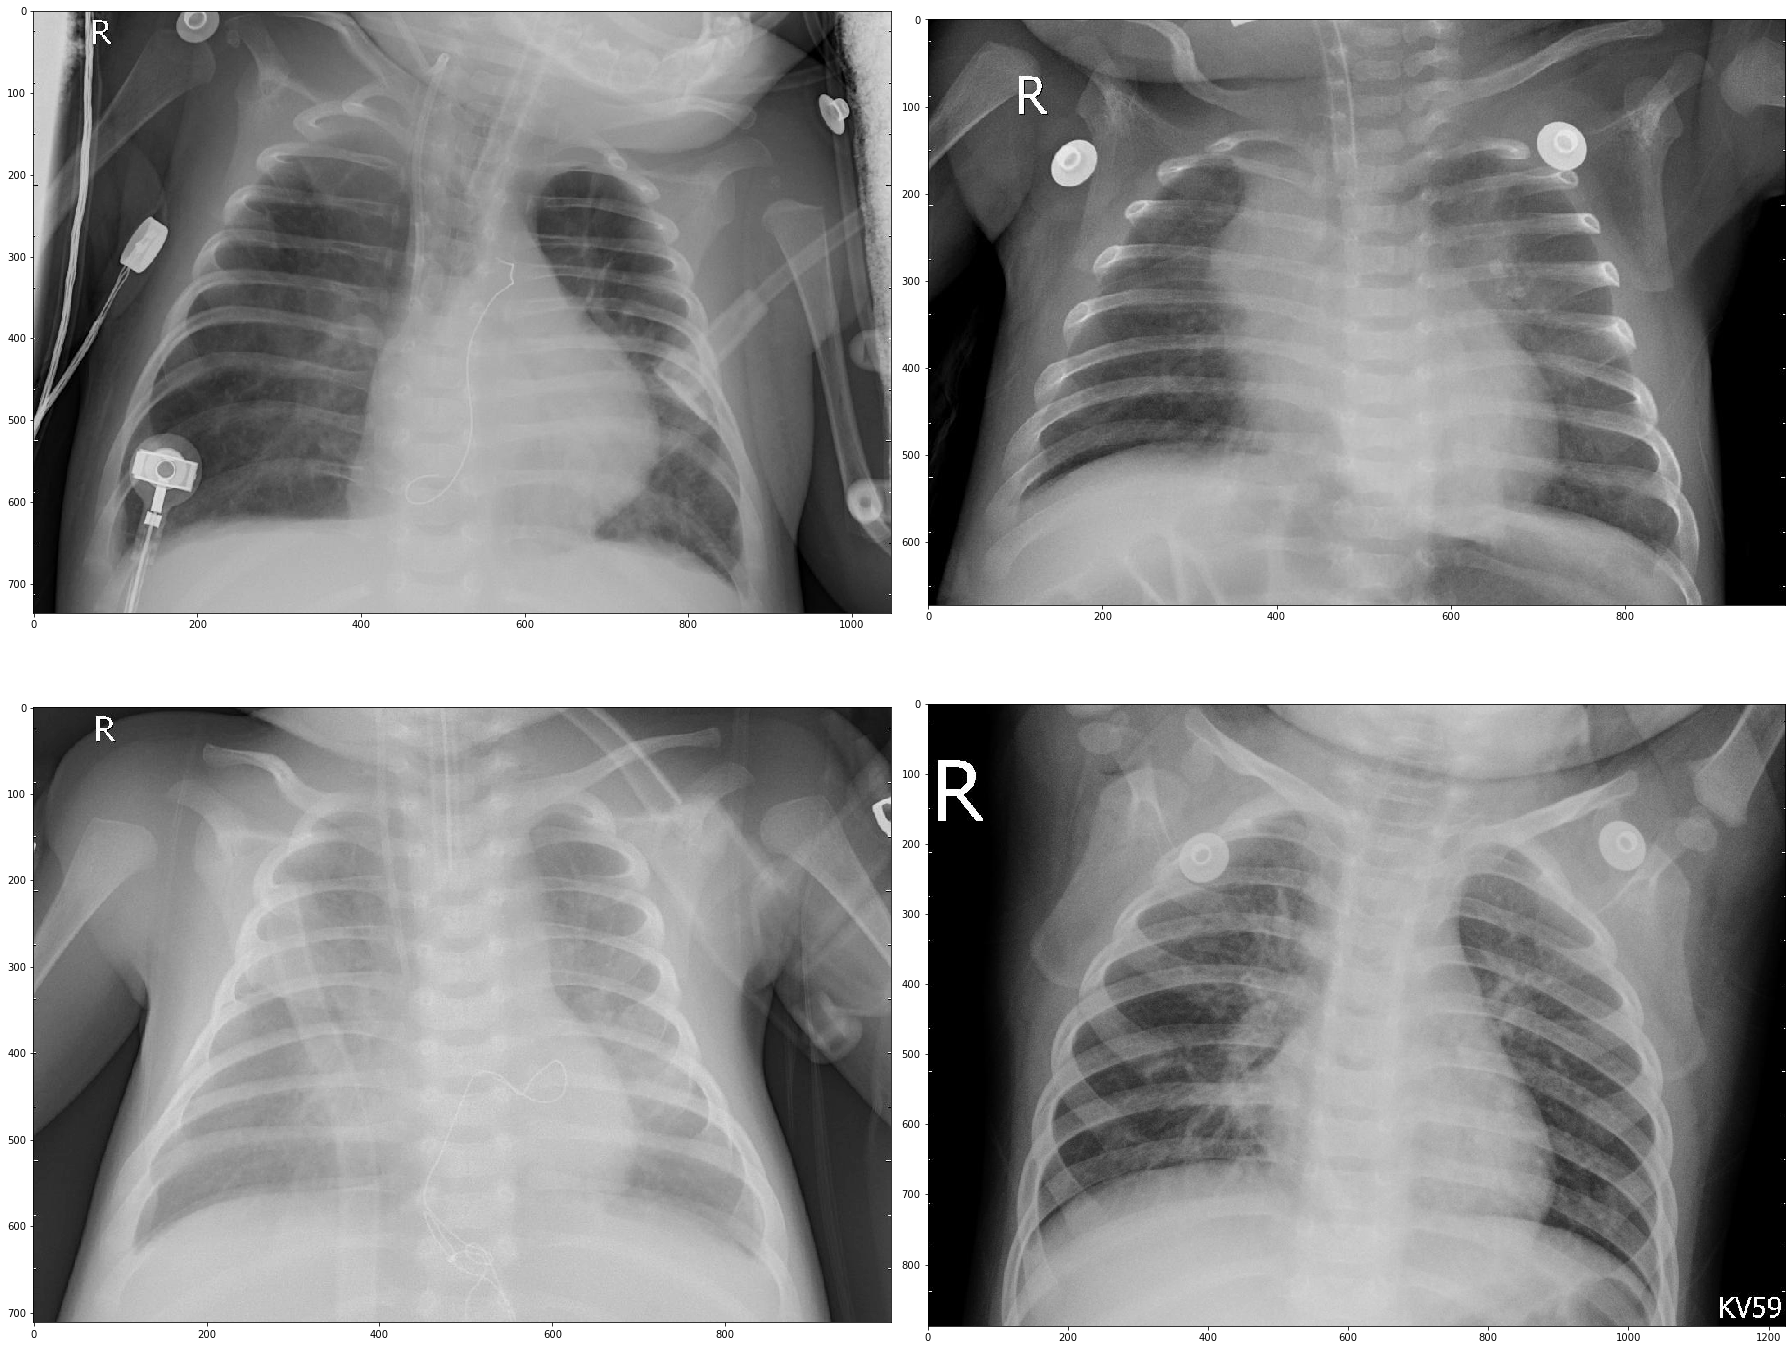

In [9]:
# plot random 4 images containing pnuemonia
plt.figure(figsize = (25, 20)) 

for i in range(4):
    plt.subplot(2, 2, i+1)    #
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
#     plt.imshow(img[i])
    plt.imshow(img, cmap = 'gray')
plt.tight_layout()
plt.show()

In [10]:
# Initialize the directory containing normal/no pnuemonia images to the variable
normal = os.listdir('Data/chest_xray/train/normal')
normal_dir = 'Data/chest_xray/train/normal'

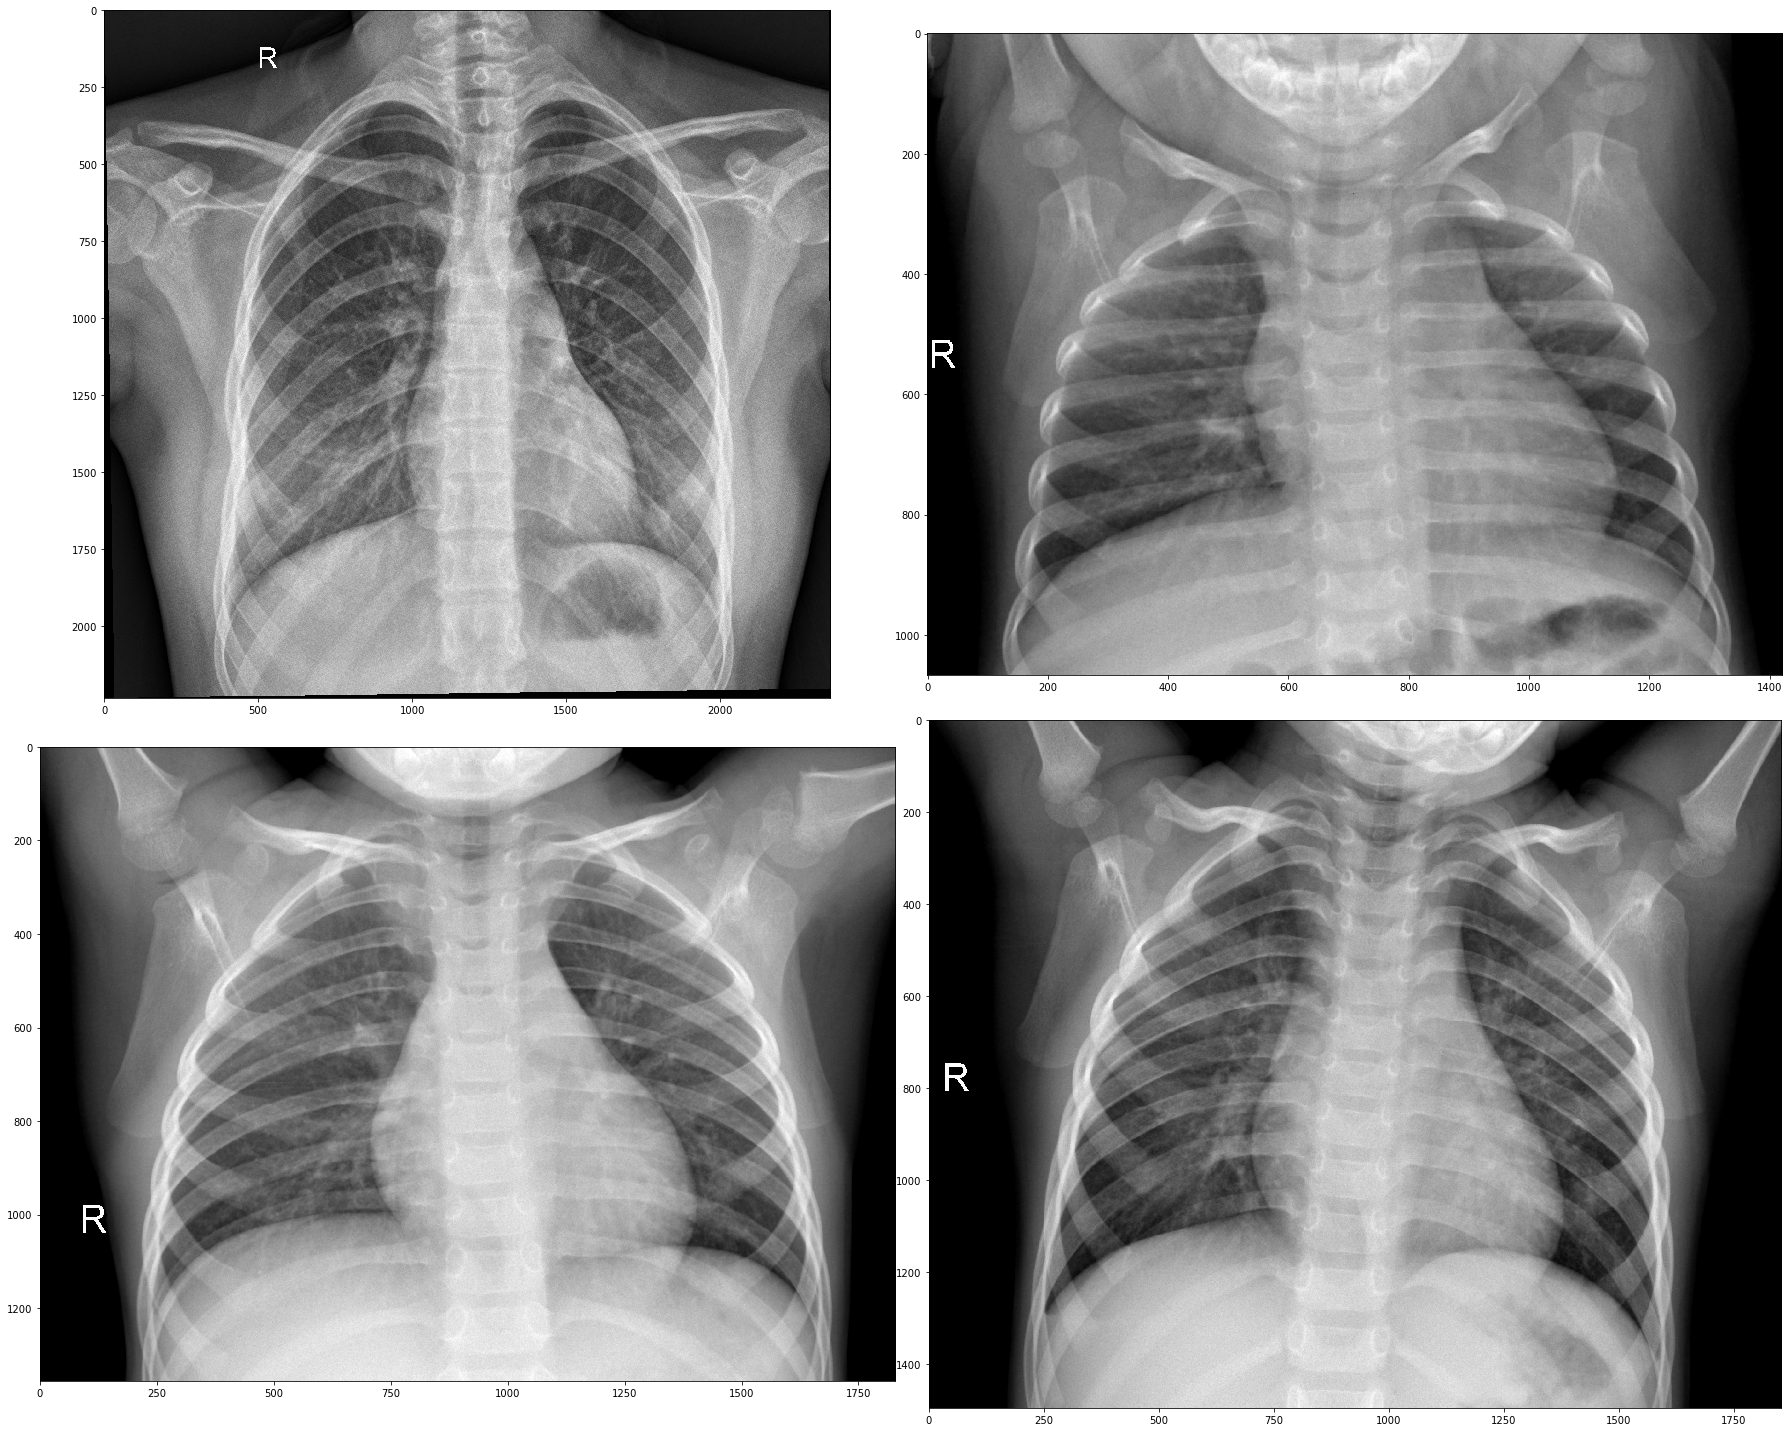

In [11]:
# plot random 4 images containing nnormal images
plt.figure(figsize = (25,20)) # specifying the overall grid size

for i in range(4):
    plt.subplot(2, 2, i+1)    # the number of images in the grid is 5*5 (25)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
#     plt.imshow(img[i])
    plt.imshow(img, cmap = 'gray')
    
plt.tight_layout()
plt.show()

Reshape all the train ,test and validation images using reshape function.

In [12]:
train_img_reshape = train_images.reshape(train_images.shape[0], -1)
test_img_reshape = test_images.reshape(test_images.shape[0], -1)
val_img_reshape = val_images.reshape(val_images.shape[0], -1)

check the shape of the images for checking the correct format(128x128x3)

In [13]:
print(train_img_reshape.shape)
print(test_img_reshape.shape)
print(val_img_reshape.shape)

(5216, 49152)
(624, 49152)
(16, 49152)


In [14]:
# checking the shape of label dataset
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(5216,)
(624,)
(16,)


The label of the images are reshaped using reshape function

In [15]:
train_labels_reshape = train_labels.reshape(train_labels.shape[0], 1)
test_labels_reshape = test_labels.reshape(test_labels.shape[0], 1)
val_labels_reshape = val_labels.reshape(val_labels.shape[0], 1) 

In [16]:
# Checking the shape of the images for correct format
print(train_labels_reshape.shape)
print(test_labels_reshape.shape)
print(val_labels_reshape.shape)

(5216, 1)
(624, 1)
(16, 1)


In [17]:
# shape of image before reshaping
train_images.shape

(5216, 128, 128, 3)

In [18]:
# shape of image after reshaping 
train_img_reshape.shape

(5216, 49152)

In [19]:
# shape of label before reshaping
train_labels.shape

(5216,)

In [20]:
# shape of label after reshaping 
train_labels_reshape.shape

(5216, 1)

### Model

Next comes the modelling phase where the prepocessed images are used for building a neural network . First let us create a baseline model to check how the model is learning the chest x_ray images. 

### Base Model 1

Created a first baseline model with input layer , two hidden layer and one output layer.

In [21]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation = 'relu', input_shape = (49152,))) 
model1.add(layers.Dense(64, activation = 'relu'))
model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [22]:
# compile and fit the model by running 30 epochs
model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(train_img_reshape,
                    train_labels_reshape,
                    epochs=30,
                    batch_size=32,
                    validation_data=(test_img_reshape, test_labels_reshape))

Epoch 1/30
163/163 [==============================] - 3s 13ms/step - loss: 0.5261 - accuracy: 0.7569 - val_loss: 0.6444 - val_accuracy: 0.6538
Epoch 2/30
163/163 [==============================] - 1s 8ms/step - loss: 0.3655 - accuracy: 0.8338 - val_loss: 0.6808 - val_accuracy: 0.7051
Epoch 3/30
163/163 [==============================] - 1s 7ms/step - loss: 0.2434 - accuracy: 0.9056 - val_loss: 0.9950 - val_accuracy: 0.6731
Epoch 4/30
163/163 [==============================] - 1s 8ms/step - loss: 0.2058 - accuracy: 0.9238 - val_loss: 0.6611 - val_accuracy: 0.7532
Epoch 5/30
163/163 [==============================] - 1s 7ms/step - loss: 0.2016 - accuracy: 0.9217 - val_loss: 0.9818 - val_accuracy: 0.6811
Epoch 6/30
163/163 [==============================] - 1s 7ms/step - loss: 0.1707 - accuracy: 0.9304 - val_loss: 0.5913 - val_accuracy: 0.7772
Epoch 7/30
163/163 [==============================] - 1s 7ms/step - loss: 0.1554 - accuracy: 0.9432 - val_loss: 1.0921 - val_accuracy: 0.6891
Epoch

In [23]:
train_result = model1.evaluate(train_img_reshape, train_labels_reshape)

163/163 [==============================] - 1s 4ms/step - loss: 0.0990 - accuracy: 0.9599


In [24]:
test_result = model1.evaluate(test_img_reshape, test_labels_reshape)

20/20 [==============================] - 0s 3ms/step - loss: 1.1877 - accuracy: 0.7163


In [25]:
print(train_result)
print(test_result)

[0.09896855056285858, 0.959930956363678]
[1.1877294778823853, 0.7163461446762085]


The baseline model accuracy rate looks pretty low on test data and its necessary to build different model.

### Model 2 

In this model 2 , convolution neural network is built using keras has it works best for image classification models. Here a simple convolution network with minimal layers and less complexity is built.

In [26]:
# convolution model with 4 layers
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (128, 128, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(32, (4, 4), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
# compile the model
model2.compile(loss = 'binary_crossentropy',
              optimizer = "sgd",
              metrics = ['acc'])
# fitting the model with 15 epochs
history2 = model2.fit(train_images,
                    train_labels_reshape,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (test_images, test_labels_reshape))


Epoch 1/20
163/163 [==============================] - 76s 464ms/step - loss: 0.5625 - acc: 0.7522 - val_loss: 1.0063 - val_acc: 0.6250
Epoch 2/20
163/163 [==============================] - 3002s 19s/step - loss: 0.4190 - acc: 0.8134 - val_loss: 0.6409 - val_acc: 0.6811
Epoch 3/20
163/163 [==============================] - 71s 434ms/step - loss: 0.2820 - acc: 0.8868 - val_loss: 0.5589 - val_acc: 0.7372
Epoch 4/20
163/163 [==============================] - 73s 446ms/step - loss: 0.2073 - acc: 0.9173 - val_loss: 0.6844 - val_acc: 0.7356
Epoch 5/20
163/163 [==============================] - 7276s 45s/step - loss: 0.1926 - acc: 0.9290 - val_loss: 0.5513 - val_acc: 0.7724
Epoch 6/20
163/163 [==============================] - 183s 1s/step - loss: 0.1391 - acc: 0.9441 - val_loss: 0.6391 - val_acc: 0.7532
Epoch 7/20
163/163 [==============================] - 67s 411ms/step - loss: 0.1345 - acc: 0.9483 - val_loss: 0.9667 - val_acc: 0.7147
Epoch 8/20
163/163 [==============================] - 73s

Let us create a function for calculating the following metrics:
* train and test data accuracy
* classification report and confusion matrix to check the model's performance
* Accuracy and loss graph for checking the overfitting and underfitting of our train and test data

In [27]:
# Function to calculate the train and test data accuracy value
def model_metrics(models):
    train_result = models.evaluate(train_images, train_labels)
    test_result = models.evaluate(test_images, test_labels)
    return print(f'train_result:{train_result},test_result:{test_result}')

In [28]:
# Function to calcuate the prediction value,classification report and confusion matrix
def model_report(models):
    
#  checking first 15 labels of model prediction
    predictions = models.predict_classes(test_images)
    predictions = predictions.reshape(1,-1)[0]
    print("predictions:",predictions[:15])
#  classification report   
    print('classification_report :',classification_report(test_labels, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))
#  confusion matrix
    cm = confusion_matrix(test_labels,predictions)
    cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
    labels = ['PNEUMONIA', 'NORMAL']
    plt.figure(figsize = (5,5))
    ax=sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
    ax.set_ylim(2, 0)
    plt.show()

In [29]:
# Function to plot accuracy and loss value of the model
def model_graph(models,history):

    fig , ax = plt.subplots(1,2)
    fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
    model_dict = history.history
    acc_values = model_dict['acc'] 
    val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
    loss_values = model_dict['loss'] 
    val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
    epochs = range(1, len(acc_values) + 1)
    ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
#     plotting loss graph
    ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    return plt.show()

In [30]:
model_metrics(model2)

20/20 [==============================] - 2s 104ms/step - loss: 1.0782 - acc: 0.7356
train_result:[0.05765095725655556, 0.9802530407905579],test_result:[1.0782222747802734, 0.7355769276618958]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
classification_report :                      precision    recall  f1-score   support

Pneumonia (Class 0)       0.97      0.30      0.46       234
   Normal (Class 1)       0.70      0.99      0.82       390

           accuracy                           0.74       624
          macro avg       0.84      0.65      0.64       624
       weighted avg       0.80      0.74      0.69       624



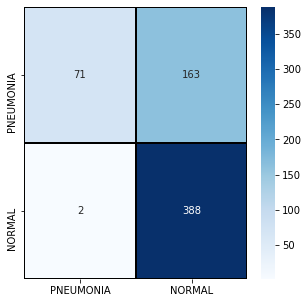

In [31]:
model_report(model2)

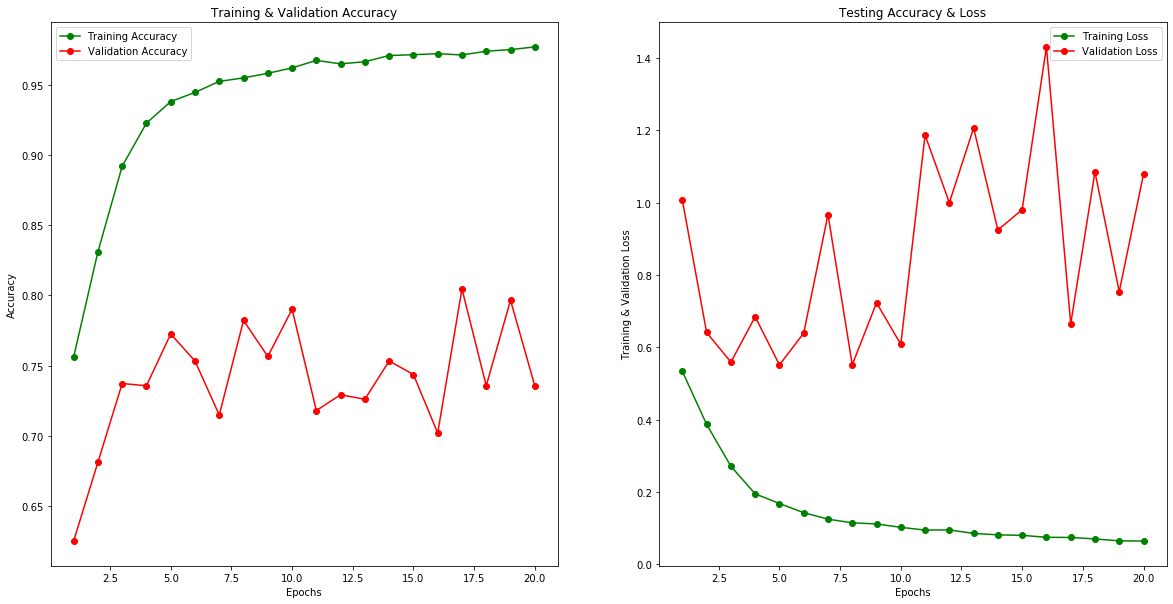

In [32]:
model_graph(model2,history2)

The above model needs more of tunning as the accuracy and loss value is not showing satisfying result and model haven't learned much on looking at the confusion matrix.

#### Data Augumentation

Let us check for the data imbalance in the images .

In [33]:
train_labels_reshape[0]

array([1.], dtype=float32)

In [34]:
train_labels_reshape[0]

array([1.], dtype=float32)

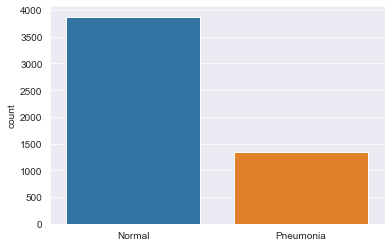

In [35]:
list = []
for i in range(len(train_labels_reshape)):
    if(train_labels_reshape[i] == 0):
        list.append("Pneumonia")
    else:
        list.append("Normal")
sns.set_style('darkgrid')
sns.countplot(list)
plt.savefig('images/chart.png')

In [36]:
# percentage of images with pneumonia 
print(train_labels[train_labels == 1].shape[0] / train_labels.shape[0])

0.7429064417177914


In [37]:
# percentage of images with no pneumonia /normal
print(train_labels[train_labels == 0].shape[0] / train_labels.shape[0])

0.2570935582822086


There is a imbalance in our image dataset as the data contains 74% of pnuemonia images and only 25% of normal images. Hence data agumentation is used to generate more samples.

In [38]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# fitting it with train dataset
datagen.fit(train_images)

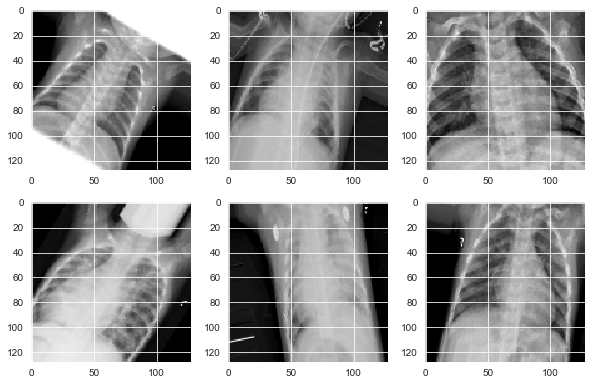

In [39]:
plt.figure(figsize = (10, 10)) 
for X_batch, y_batch in datagen.flow(train_images, train_labels_reshape, batch_size=9):
    for i in range(6):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i])
        plt.savefig('images/datagumentation.png')
    break
    

### Model 3

The model 3 is created using data agumentation 

In [40]:
# model with 4 layers  
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128 ,128, 3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
# compile the model
model3.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [41]:
# fitting the model using datagen with 12 epochs
history3 = model3.fit(datagen.flow(train_images,train_labels_reshape, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(test_images, test_labels_reshape))


Epoch 1/20
163/163 [==============================] - 123s 749ms/step - loss: 0.5772 - acc: 0.7473 - val_loss: 0.6401 - val_acc: 0.6250
Epoch 2/20
163/163 [==============================] - 123s 751ms/step - loss: 0.5590 - acc: 0.7341 - val_loss: 0.6176 - val_acc: 0.6298
Epoch 3/20
163/163 [==============================] - 123s 752ms/step - loss: 0.4956 - acc: 0.7749 - val_loss: 0.5733 - val_acc: 0.6843
Epoch 4/20
163/163 [==============================] - 123s 754ms/step - loss: 0.4773 - acc: 0.7813 - val_loss: 0.5363 - val_acc: 0.7260
Epoch 5/20
163/163 [==============================] - 123s 757ms/step - loss: 0.4079 - acc: 0.8287 - val_loss: 0.5133 - val_acc: 0.7340
Epoch 6/20
163/163 [==============================] - 124s 758ms/step - loss: 0.3883 - acc: 0.8248 - val_loss: 0.4889 - val_acc: 0.7676
Epoch 7/20
163/163 [==============================] - 124s 758ms/step - loss: 0.3606 - acc: 0.8472 - val_loss: 0.4698 - val_acc: 0.7708
Epoch 8/20
163/163 [============================

In [42]:
model_metrics(model3)

20/20 [==============================] - 4s 171ms/step - loss: 0.3362 - acc: 0.8830
train_result:[0.1656007319688797, 0.9401840567588806],test_result:[0.3362022936344147, 0.8830128312110901]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
classification_report :                      precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.76      0.83       234
   Normal (Class 1)       0.87      0.96      0.91       390

           accuracy                           0.88       624
          macro avg       0.89      0.86      0.87       624
       weighted avg       0.89      0.88      0.88       624



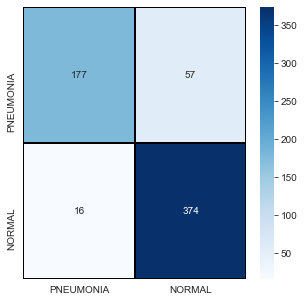

In [43]:
model_report(model3)

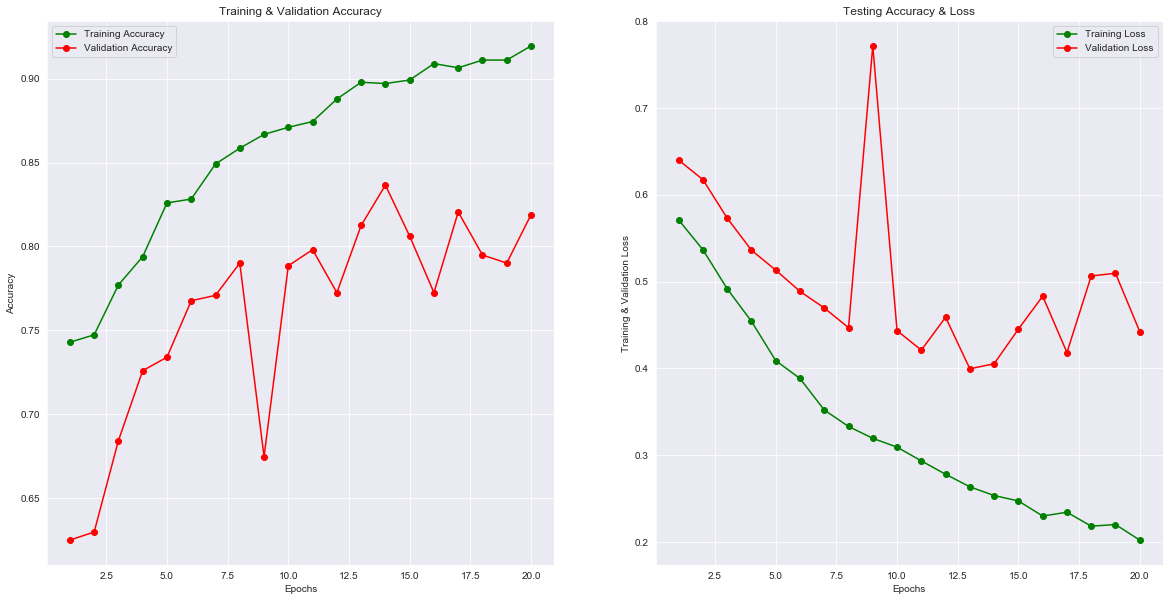

In [44]:
model_graph(model3,history3)

Model 3 looks good except for the overfitting of test data and futher model needs to be built to check for improvement in the confusion matrix data.

### Model 4

The model 4 is created with initial layer with less neurons and gradually adding more middle  convolution layers with more neurons and one output layer. Various dropout layers are added to handle overfitting and BatchNormalization is used to scale the input layers.

In [45]:
model4 = Sequential()
model4.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(BatchNormalization())
model4.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model4.add(Flatten())
model4.add(Dense(units = 128 , activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(units = 1 , activation = 'sigmoid'))
model4.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)       

In [46]:
history4 = model4.fit(datagen.flow(train_images, train_labels_reshape, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(test_images, test_labels_reshape))

Epoch 1/20
163/163 [==============================] - 167s 1s/step - loss: 0.8067 - acc: 0.7897 - val_loss: 29.8982 - val_acc: 0.6250
Epoch 2/20
163/163 [==============================] - 167s 1s/step - loss: 0.2888 - acc: 0.8961 - val_loss: 29.6146 - val_acc: 0.6250
Epoch 3/20
163/163 [==============================] - 166s 1s/step - loss: 0.2269 - acc: 0.9118 - val_loss: 20.4162 - val_acc: 0.6250
Epoch 4/20
163/163 [==============================] - 166s 1s/step - loss: 0.2093 - acc: 0.9186 - val_loss: 0.3370 - val_acc: 0.8830
Epoch 5/20
163/163 [==============================] - 166s 1s/step - loss: 0.1754 - acc: 0.9395 - val_loss: 4.5918 - val_acc: 0.6250
Epoch 6/20
163/163 [==============================] - 167s 1s/step - loss: 0.1785 - acc: 0.9376 - val_loss: 1.2686 - val_acc: 0.6554
Epoch 7/20
163/163 [==============================] - 166s 1s/step - loss: 0.1973 - acc: 0.9343 - val_loss: 1.7298 - val_acc: 0.6667
Epoch 8/20
163/163 [==============================] - 166s 1s/step

In [47]:
model_metrics(model4)

20/20 [==============================] - 5s 248ms/step - loss: 0.7056 - acc: 0.6891
train_result:[0.23320339620113373, 0.8801763653755188],test_result:[0.7055564522743225, 0.6891025900840759]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
classification_report :                      precision    recall  f1-score   support

Pneumonia (Class 0)       0.98      0.18      0.30       234
   Normal (Class 1)       0.67      1.00      0.80       390

           accuracy                           0.69       624
          macro avg       0.82      0.59      0.55       624
       weighted avg       0.78      0.69      0.61       624



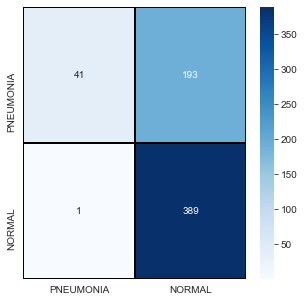

<Figure size 432x288 with 0 Axes>

In [48]:
model_report(model4)
plt.savefig('images/confusionmatrix.png')

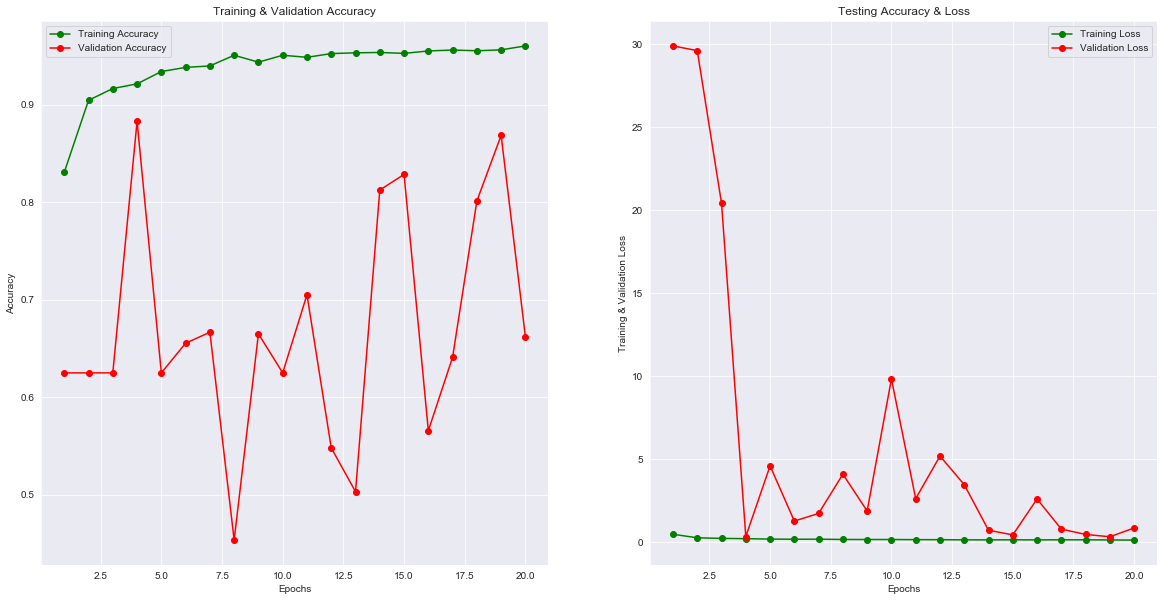

In [49]:
model_graph(model4, history4)


The model 4 metrics value is low and let us see how the confusion matrix improves if we introduce learning rate for the model.

Let us check the normal and pnuemonia images predicted by the model

In [50]:
predictions = model3.predict_classes(test_images)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

In [51]:
correct = np.nonzero(predictions == test_labels)[0]
incorrect = np.nonzero(predictions != test_labels)[0]

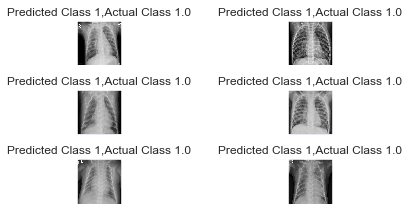

In [52]:
# Displaying the images correctly predicted by the model
i = 0
for c in correct[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[c].reshape(128,128,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], test_labels[c]))
    plt.tight_layout()
    i += 1

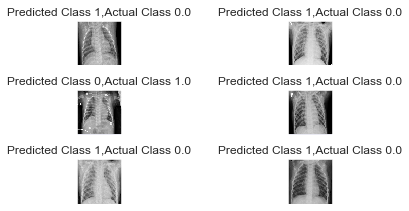

In [53]:
#  Displaying the images wrongly predicted by the model
i = 0
for c in incorrect[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[c].reshape(128,128,3), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], test_labels[c]))
    plt.tight_layout()
    i += 1

### Model 5

Model 5 with 6 layers is created to improve the learning rate of the model . Hence a learning rate of 0.000001 is added to the network to improve our model performance.

In [54]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


In [55]:
model5 = Sequential()
model5.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model5.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model5.add(Dropout(0.1))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model5.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model5.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model5.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model5.add(Flatten())
model5.add(Dense(units = 128 , activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(units = 1 , activation = 'sigmoid'))
# compiling the model
model5.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)       

In [56]:
# fitting the model with 15 epoch and call back with learning rate
history5 = model5.fit(datagen.flow(train_images, train_labels_reshape, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(test_images, test_labels_reshape),callbacks = [learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 159s 968ms/step - loss: 0.8475 - acc: 0.8043 - val_loss: 19.3600 - val_acc: 0.6250
Epoch 2/20
163/163 [==============================] - 158s 970ms/step - loss: 0.2948 - acc: 0.8852 - val_loss: 16.9370 - val_acc: 0.6250
Epoch 3/20
163/163 [==============================] - 158s 970ms/step - loss: 0.2324 - acc: 0.9107 - val_loss: 1.3169 - val_acc: 0.6651
Epoch 4/20
163/163 [==============================] - 159s 976ms/step - loss: 0.2014 - acc: 0.9227 - val_loss: 0.5202 - val_acc: 0.8510
Epoch 5/20
163/163 [==============================] - 159s 973ms/step - loss: 0.1948 - acc: 0.9304 - val_loss: 10.5807 - val_acc: 0.6250
Epoch 6/20
163/163 [==============================] - 159s 975ms/step - loss: 0.1783 - acc: 0.9350 - val_loss: 2.4476 - val_acc: 0.6330

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/20
163/163 [==============================] - 175s 1s/step - loss: 0.1432 - acc: 0.9553 - va

In [57]:
model_metrics(model5)

20/20 [==============================] - 5s 257ms/step - loss: 0.2810 - acc: 0.8958
train_result:[0.30834051966667175, 0.880943238735199],test_result:[0.2809855341911316, 0.8958333134651184]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
classification_report :                      precision    recall  f1-score   support

Pneumonia (Class 0)       0.82      0.92      0.87       234
   Normal (Class 1)       0.95      0.88      0.91       390

           accuracy                           0.90       624
          macro avg       0.89      0.90      0.89       624
       weighted avg       0.90      0.90      0.90       624



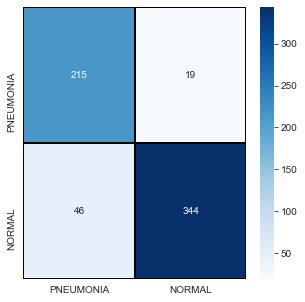

In [58]:
model_report(model5)

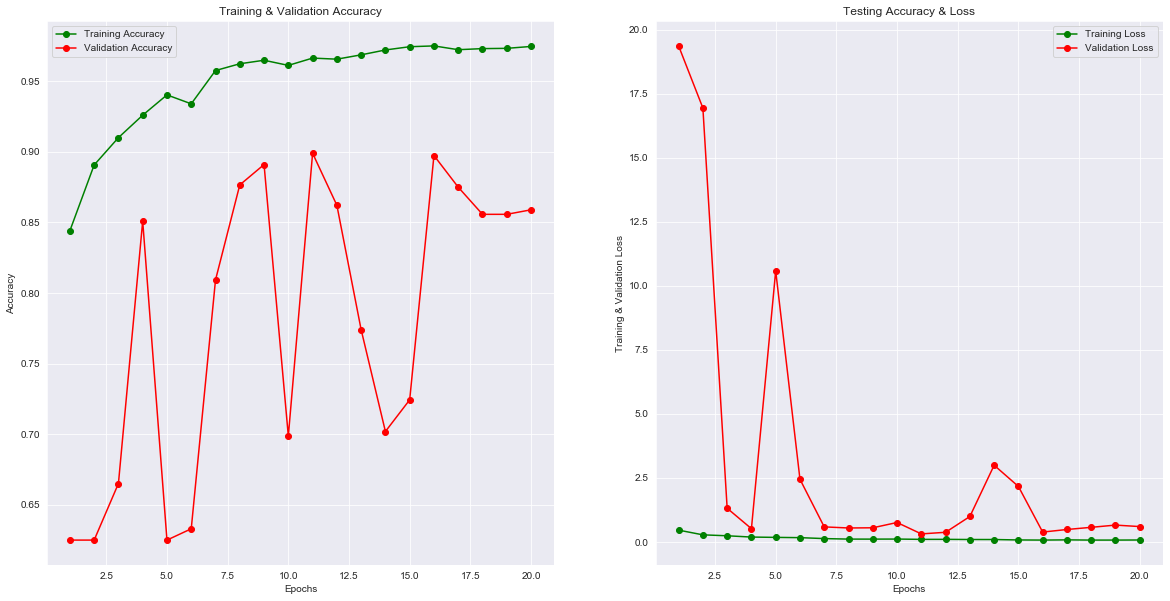

In [59]:
model_graph(model5, history5)

Compared to all the model created, model 5 shows that the number of true positive ,true negative , false positive and false negative have improved and given satisfying result. The accuracy graph shows overfitting of test data. Hence let us check with different models for handling overfitting.

### Model 6

Model 6 is created by using regularix=zation from keras  for handling overfitting of our test data and to check which works best for the final model.

In [60]:
from keras import regularizers

In [61]:
model6 = Sequential()
model6.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model6.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model6.add(Dropout(0.5))
model6.add(Flatten())

model6.add(Dense(units = 2048 , kernel_regularizer=regularizers.l2(0.005), activation = 'relu'))
model6.add(Dropout(0.1))

model6.add(Dense(units = 1024 , kernel_regularizer=regularizers.l2(0.005), activation = 'relu'))
model6.add(Dropout(0.05))

model6.add(BatchNormalization())
model6.add(Dense(units = 1 , activation = 'sigmoid'))

model6.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 256)      

In [62]:
history6 = model6.fit(datagen.flow(train_images, train_labels_reshape, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(test_images, test_labels_reshape),callbacks = [learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 258s 2s/step - loss: 7.0487 - acc: 0.7656 - val_loss: 1.8773 - val_acc: 0.6298
Epoch 2/20
163/163 [==============================] - 214s 1s/step - loss: 0.8643 - acc: 0.8410 - val_loss: 1.4198 - val_acc: 0.7003
Epoch 3/20
163/163 [==============================] - 214s 1s/step - loss: 0.7523 - acc: 0.8742 - val_loss: 0.9395 - val_acc: 0.8237
Epoch 4/20
163/163 [==============================] - 214s 1s/step - loss: 0.7014 - acc: 0.8667 - val_loss: 1.7267 - val_acc: 0.6250
Epoch 5/20
163/163 [==============================] - 215s 1s/step - loss: 0.6111 - acc: 0.8856 - val_loss: 0.6470 - val_acc: 0.8494
Epoch 6/20
163/163 [==============================] - 216s 1s/step - loss: 0.5194 - acc: 0.9010 - val_loss: 0.7958 - val_acc: 0.7885
Epoch 7/20
163/163 [==============================] - 215s 1s/step - loss: 0.5281 - acc: 0.8893 - val_loss: 1.0411 - val_acc: 0.6731

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.000300000

In [63]:
model_metrics(model6)

20/20 [==============================] - 6s 269ms/step - loss: 0.3409 - acc: 0.8750
train_result:[0.15550856292247772, 0.9491947889328003],test_result:[0.34091445803642273, 0.875]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
classification_report :                      precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.72      0.81       234
   Normal (Class 1)       0.85      0.97      0.91       390

           accuracy                           0.88       624
          macro avg       0.89      0.84      0.86       624
       weighted avg       0.88      0.88      0.87       624



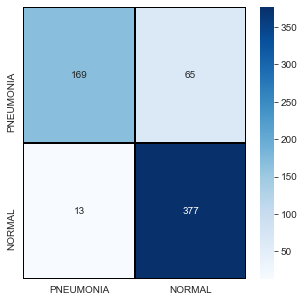

In [64]:
model_report(model6)

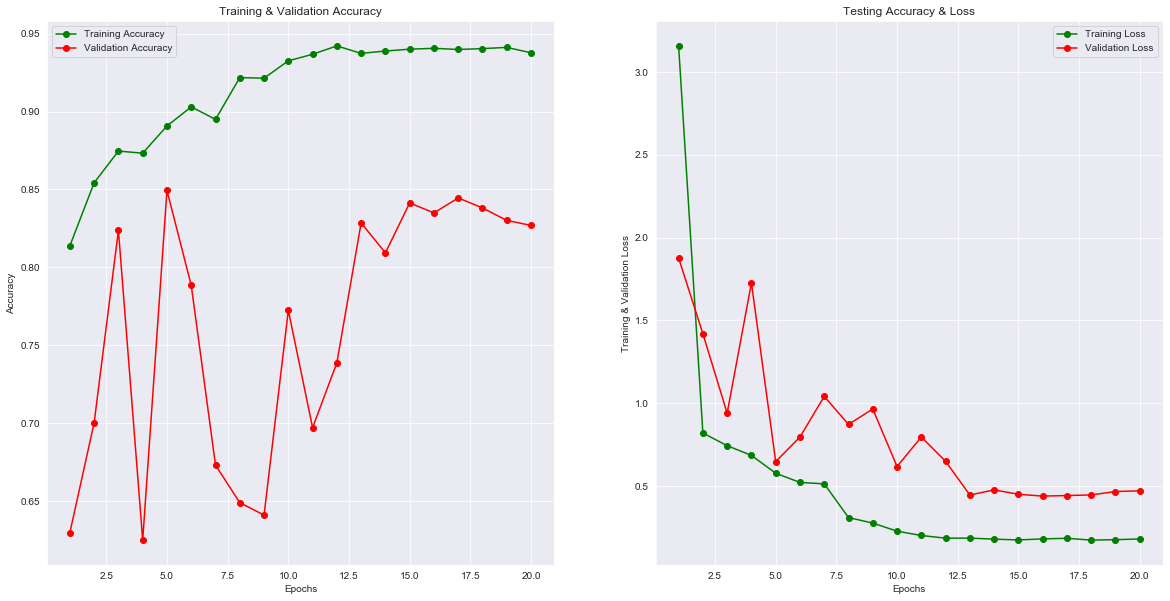

In [65]:
model_graph(model6, history6)

Model 6 haven't handled the overfitting of test data well and hence let us check with both L1 and L2 regularization technique.

### Model 7

Model 7 is built using L1 and L2 regularization technique using keras.

In [66]:
model7 = Sequential()
model7.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model7.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model7.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model7.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model7.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model7.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model7.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model7.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model7.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model7.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model7.add(Dropout(0.5))
model7.add(Flatten())

model7.add(Dense(units = 2048 , kernel_regularizer=regularizers.l1(0.0005), activation = 'relu'))
model7.add(Dropout(0.1))

model7.add(Dense(units = 1024 , kernel_regularizer=regularizers.l2(0.005), activation = 'relu'))
model7.add(Dropout(0.05))

model7.add(BatchNormalization())
model7.add(Dense(units = 1 , activation = 'sigmoid'))

model7.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['acc'])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 256)      

In [67]:
history7 = model7.fit(datagen.flow(train_images, train_labels_reshape, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(test_images, test_labels_reshape),callbacks = [learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 251s 2s/step - loss: 27.2966 - acc: 0.7180 - val_loss: 6.3134 - val_acc: 0.6250
Epoch 2/20
163/163 [==============================] - 298s 2s/step - loss: 4.6878 - acc: 0.8194 - val_loss: 4.7547 - val_acc: 0.8221
Epoch 3/20
163/163 [==============================] - 324s 2s/step - loss: 4.5797 - acc: 0.8691 - val_loss: 4.9743 - val_acc: 0.7949
Epoch 4/20
163/163 [==============================] - 266s 2s/step - loss: 4.7247 - acc: 0.8819 - val_loss: 4.9588 - val_acc: 0.7099

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/20
163/163 [==============================] - 265s 2s/step - loss: 1.7710 - acc: 0.9011 - val_loss: 2.9911 - val_acc: 0.6250
Epoch 6/20
163/163 [==============================] - 261s 2s/step - loss: 1.5078 - acc: 0.9230 - val_loss: 2.0523 - val_acc: 0.6763

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 7/20
163/163 [===================

In [68]:
model_metrics(model7)

20/20 [==============================] - 6s 290ms/step - loss: 0.3133 - acc: 0.9038
train_result:[0.16217796504497528, 0.9476610422134399],test_result:[0.31330204010009766, 0.9038461446762085]


/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
classification_report :                      precision    recall  f1-score   support

Pneumonia (Class 0)       0.95      0.79      0.86       234
   Normal (Class 1)       0.88      0.97      0.93       390

           accuracy                           0.90       624
          macro avg       0.92      0.88      0.89       624
       weighted avg       0.91      0.90      0.90       624



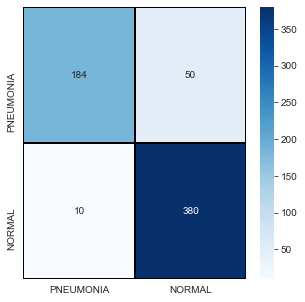

In [69]:
model_report(model7)

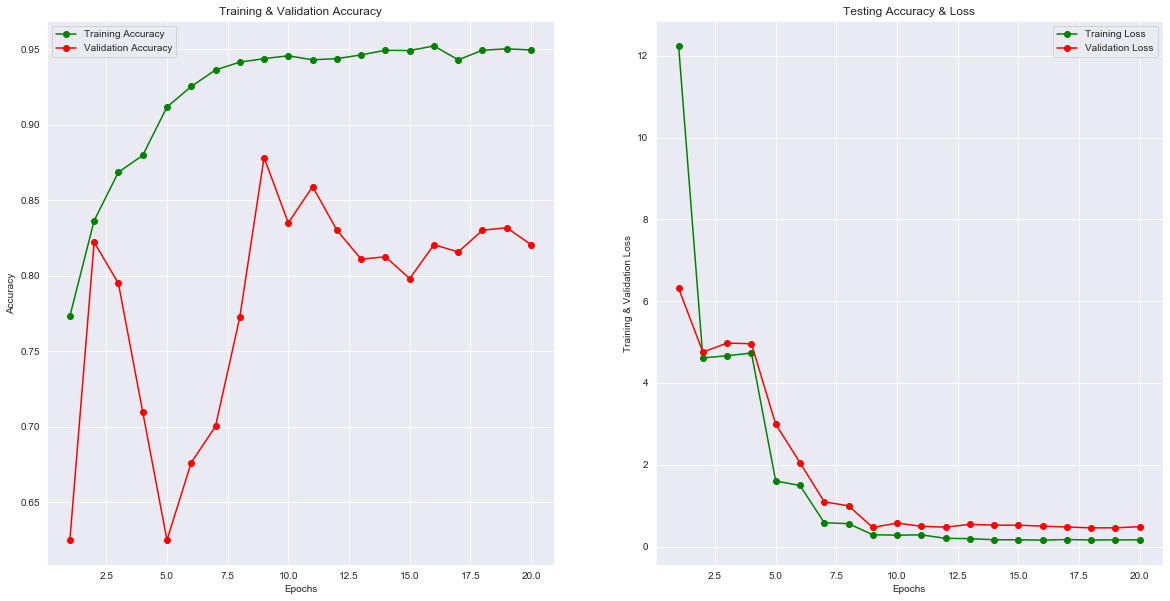

In [70]:
model_graph(model7, history7)

Model 8 shows good result on loss graph but overfitting on the accuracy graph. The true positive rate looks low comapared to model 5 . 

### Interpretation

On comparing all the models, model 5 shows a satisfactory result as the number of true positive and negative are higher and number of false negative are lesser compared to other models. The model shows gradual learning and the overall performance shows upward trend.

**True Positives** : 201(Number of images having pneumonia )\
**True Negatives** : 368(Number of images not having pnuemonia(normal))\
**False Positive** : 22(Number of images  who donot have pnuemonia but predicted as pnuemonia)\
**False Negative** : 33(Number of images  who have pnuemonia but predicted as not having                            pnuemonia)

/Users/janakiganesh/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
classification_report :                      precision    recall  f1-score   support

Pneumonia (Class 0)       0.82      0.92      0.87       234
   Normal (Class 1)       0.95      0.88      0.91       390

           accuracy                           0.90       624
          macro avg       0.89      0.90      0.89       624
       weighted avg       0.90      0.90      0.90       624



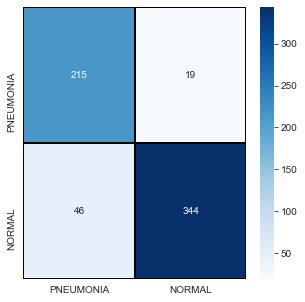

In [72]:
predictions = model5.predict_classes(test_images)
predictions = predictions.reshape(1,-1)[0]
print("predictions:",predictions[:15])
#  classification report   
print('classification_report :',classification_report(test_labels, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))
#  confusion matrix
cm = confusion_matrix(test_labels,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
labels = ['PNEUMONIA', 'NORMAL']
plt.figure(figsize = (5,5))
ax=sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)
ax.set_ylim(2, 0)
plt.savefig('images/confusionmatrix')

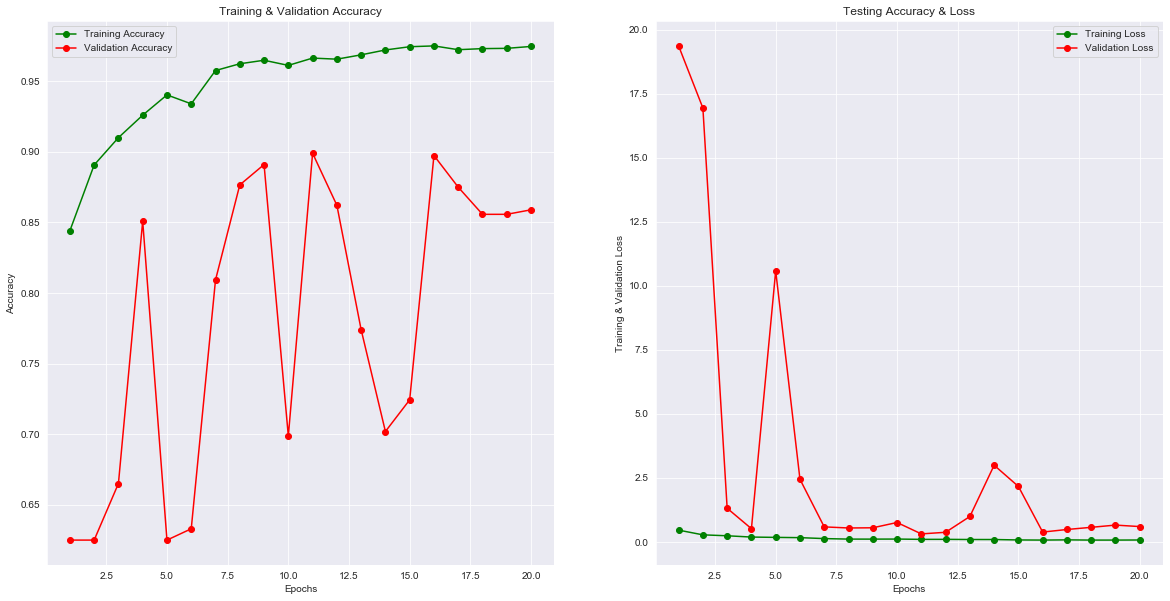

In [73]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
#     Fetching the accuracy value from the model history
model_dict = history5.history
acc_values = model_dict['acc'] 
val_acc_values = model_dict['val_acc']
#     Fetching the loss value from the model history
loss_values = model_dict['loss'] 
val_loss_values = model_dict['val_loss']
#     plotting accuracy graph
epochs = range(1, len(acc_values) + 1)
ax[0].plot(epochs , acc_values , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc_values , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
#     plotting loss graph
ax[1].plot(epochs , loss_values , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss_values , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.savefig('images/graph.png')

## Conclusion

The model 5 performs well in predicting the given image classification dataset. The model out performed all the other model in terms of accuracy and classification report metrics. Hence considering it as our final model for detecting pnuemonia in chect x_ray images.

## Next Step

* The overfitting of accuracy graph needs to be improved
* More data has to be collected to train the model for better learning
* More layers and more complexity needs to be added to check for the model performance.
* Collection of original report from the hospital to check the model prediction againt the    radiologist report